# Arvores de Decisão - Diabetes
###  Disponível em https://www.kaggle.com/uciml/pima-indians-diabetes-database

Attributes:

Pregnancies: Number of times pregnant - Gravidez

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test - Glicose

BloodPressure: Diastolic blood pressure (mm Hg) - Pressão Arterial

SkinThickness: Triceps skin fold thickness (mm)  - Espessura do tríceps

Insulin: 2-Hour serum insulin (mu U/ml) - Insulina

BMI: Body mass index (weight in kg/(height in m)^2) - IMC

DiabetesPedigreeFunction: Diabetes pedigree function - Função que leva em conta doenças na familia

Age: Age (years)

Outcome: Class variable (0 or 1) - 0 : Não tem Diabetes, 1: Possui Diabetes

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("diabetes.csv")
df.rename(columns={"Outcome": "Class"} , inplace=True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Class                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Preparação dos dados

### limpeza dos dados missing

In [5]:
len(df)

768

In [6]:
df2 = df
df2 = df2.dropna()
len(df2)

768

In [7]:
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Aplicar o algoritmo de Classificação - Árvore de Decisão

In [8]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [9]:
# particionar os conjuntos de treino e teste
from sklearn.model_selection import train_test_split

diabetes_data = df2.loc[:,["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin",
                       "BMI", "DiabetesPedigreeFunction", "Age"]]
diabetes_target = df2["Class"]

In [10]:
diabetes_data[:3]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32


In [11]:
diabetes_target[:3]

0    1
1    0
2    1
Name: Class, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    diabetes_data, diabetes_target, test_size=0.33, random_state=42)

X_train[:3]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
464,10,115,98,0,0,24.0,1.022,34
223,7,142,60,33,190,28.8,0.687,61
393,4,116,72,12,87,22.1,0.463,37


In [13]:
print("# dados de treino = ", len(X_train))
print("# dados de teste = ", len(X_test))    

# dados de treino =  514
# dados de teste =  254


### aplicar o algoritmo de arvores de decisao

In [14]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.709


In [15]:
import sklearn.metrics as metrics

metrics.confusion_matrix(y_test, tree.predict(X_test))

array([[127,  41],
       [ 33,  53]])

### Previsao

In [16]:
import numpy as np

In [17]:
# 0 = não tem diabetes, 1 = tem diabetes

ocorrencias = [ 
#Pregnancies Glucose BloodPressure    SkinThickness Insulin    BMI    DiabetesPedigreeFunction  Age
[   3,          150,         75,             36,        0,     36.1,   0.62,                      55  ],
[   0,          90,          90,             40,        90,    30,     0.7,                      32  ],
[   2,          135,         75,             28,        70,    29,     0.5,                      47  ]
]
               
   
saida =  '{:03.1f}\t\t{:03.1f}\t{:03.1f}\t\t{:03.1f}\t\t{:03.1f}\t{:03.1f}\t\t{:03.1f}\t{:03.1f}\t{:s}'               
  
print("Pregnancies \tGlucose\tBloodPressure\tSkinThickness Insulin    BMI    DiabetesPFun    Age")
for ocorrencia in ocorrencias:
    ocorrencia = np.array(ocorrencia).reshape(1, -1) 
    classe = "Não tem diabetes" if tree.predict(ocorrencia) == 0 else "Possui Diabetes"
    #print(classe)
    print(saida.format(ocorrencia[0][0], ocorrencia[0][1], ocorrencia[0][2], ocorrencia[0][3],
                       ocorrencia[0][4], ocorrencia[0][5], ocorrencia[0][6], ocorrencia[0][7], classe))

Pregnancies 	Glucose	BloodPressure	SkinThickness Insulin    BMI    DiabetesPFun    Age
3.0		150.0	75.0		36.0		0.0	36.1		0.6	55.0	Possui Diabetes
0.0		90.0	90.0		40.0		90.0	30.0		0.7	32.0	Não tem diabetes
2.0		135.0	75.0		28.0		70.0	29.0		0.5	47.0	Não tem diabetes


### Verificando os atributos mais relevantes

In [18]:
print(list(df.columns[:-1]))
tree.feature_importances_

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


array([0.03669111, 0.39394111, 0.10523598, 0.04884907, 0.09388844,
       0.16631872, 0.06580802, 0.08926756])

In [19]:
dfi = pd.DataFrame()
dfi['atributo'] = list(df.columns[:-1])
dfi['importancia'] = tree.feature_importances_
dfi

,atributo,importancia
0,Pregnancies,0.036691
1,Glucose,0.393941
2,BloodPressure,0.105236
3,SkinThickness,0.048849
4,Insulin,0.093888
5,BMI,0.166319
6,DiabetesPedigreeFunction,0.065808
7,Age,0.089268


In [20]:
dfi.sort_values(by="importancia", ascending=False)

,atributo,importancia
1,Glucose,0.393941
5,BMI,0.166319
2,BloodPressure,0.105236
4,Insulin,0.093888
7,Age,0.089268
6,DiabetesPedigreeFunction,0.065808
3,SkinThickness,0.048849
0,Pregnancies,0.036691


Atributos mais relavantes


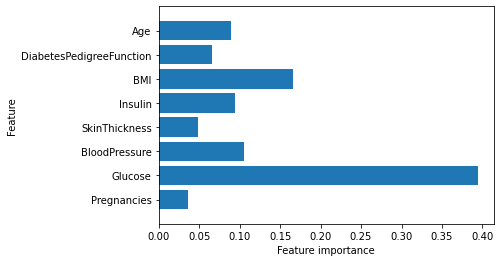

<Figure size 864x720 with 0 Axes>

In [21]:
# mostrar os atributos mais relavantes (features)
import matplotlib.pyplot as plt
%matplotlib inline

def plot_feature_importances_cancer(model):
    columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", 
                       "BMI", "DiabetesPedigreeFunction", "Age"]
    n_features = len(columns)
    plt.barh(range(n_features), tree.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.figure(figsize=(12,10))
    print ("Atributos mais relavantes")
    plt.show()
    

plot_feature_importances_cancer(tree)

In [22]:
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", 
                       "BMI", "DiabetesPedigreeFunction", "Age"]
dict_features =  {}
for name, feature, in zip(columns,  tree.feature_importances_):
    dict_features[name] = feature
dict_features

{'Pregnancies': 0.036691112268639484,
 'Glucose': 0.39394110999442356,
 'BloodPressure': 0.10523598192982168,
 'SkinThickness': 0.04884906980811649,
 'Insulin': 0.0938884391553898,
 'BMI': 0.16631871513760388,
 'DiabetesPedigreeFunction': 0.06580801646616855,
 'Age': 0.0892675552398366}

In [23]:
# ordenar
sorted(dict_features.items(), key=lambda x: -x[1])

[('Glucose', 0.39394110999442356),
 ('BMI', 0.16631871513760388),
 ('BloodPressure', 0.10523598192982168),
 ('Insulin', 0.0938884391553898),
 ('Age', 0.0892675552398366),
 ('DiabetesPedigreeFunction', 0.06580801646616855),
 ('SkinThickness', 0.04884906980811649),
 ('Pregnancies', 0.036691112268639484)]

### Analisando a árvore de decisao

In [24]:
#!pip install graphviz

In [25]:
# Class: negative, positive
Class = ["negative", "positive"]
features = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin",
                       "BMI", "DiabetesPedigreeFunction", "Age"]
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["negative","positive",],
                feature_names=features, impurity=False, filled=True)

In [26]:
#!pip install graphviz
!ls *.dot

tree.dot


In [27]:
!pwd

/home/valencar/Dropbox/AULAS-REMOTAS/Alunos-UEPB-TopicosEspeciaisEmBancoDeDados/ArvoresDeDecisao


In [28]:
# instalar o graphviz: https://anaconda.org/anaconda/graphviz
# http://www.graphviz.org/Download_macos.php
#

folder = '/home/valencar/Dropbox/AULAS-REMOTAS/Alunos-UEPB-TopicosEspeciaisEmBancoDeDados/ArvoresDeDecisao'

import graphviz
from IPython.display import set_matplotlib_formats, display

with open(folder + '/' +"tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

## Exercício: Retirar os 2 atributos menos significativos e mostrar as métricas